In [7]:
from read_data import *
from changepoint_detection import *

In [8]:
data = process_data()

In [9]:
selected_sensors = ["CH1_Moment", "CH2_Kraft"]

In [10]:
changepoints = generate_changepoints(data, selected_sensors)

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\ruptures\costs\costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


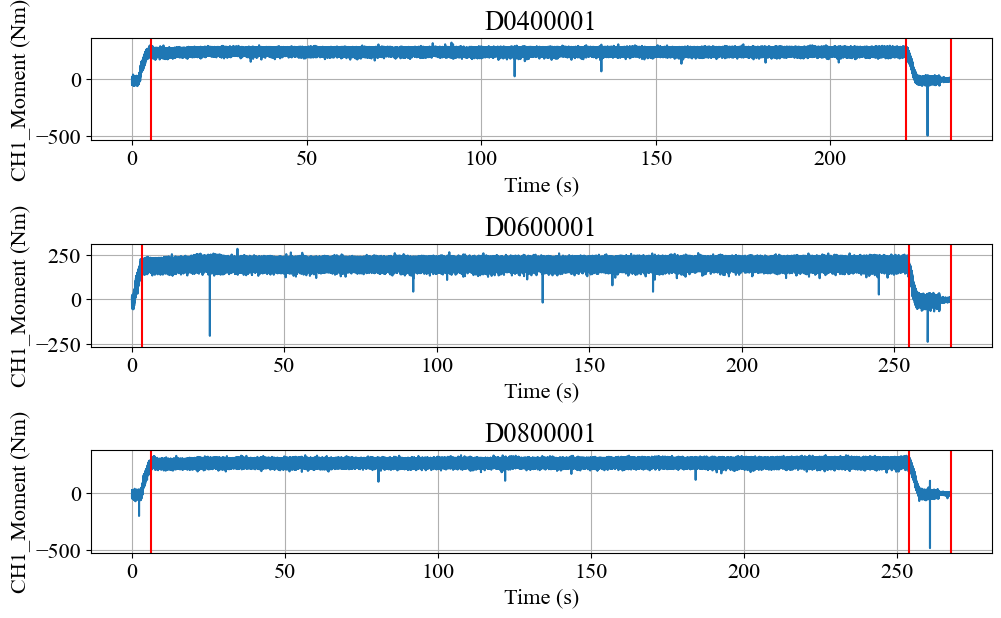

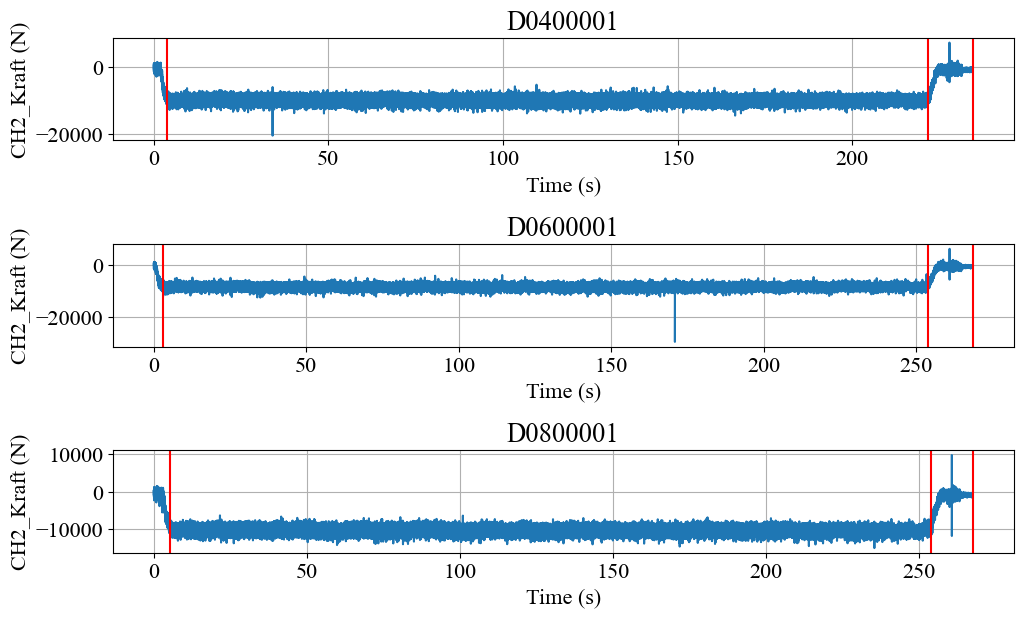

In [5]:
datasets = [
            'D0400001',
            'D0600001',
            'D0800001'
        ]

plot_change_points_mult(datasets, data, changepoints, "CH1_Moment", (10, 6), "D_datasets_CH1_cpt.pdf")
plot_change_points_mult(datasets, data, changepoints, "CH2_Kraft", (10, 6), "D_datasets_CH2_cpt.pdf")

In [23]:
def plot_change_points_all(datasets, data, change_points, sensor_name, fig_size, fig_name):
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=fig_size)
    fig.tight_layout(h_pad=3, w_pad=2)
    i = 0
    row=0
    while (i < 10):
        data_set = datasets[i]
        x_value = data[data_set]["dat"]["time"]
        hdr = data[data_set]["hdr"]
        y_value = data[data_set]["dat"][sensor_name]
        axs[row, 0].plot(x_value.values, y_value.values)
        axs[row, 0].set_ylabel("(" + hdr.vert_units[hdr.channel_names.index(sensor_name)] + ")")
        axs[row, 0].set_xlabel("Time (s)")
        axs[row, 0].set_title(data_set)
        for xc in change_points[data_set][sensor_name]["change_points"]:
            axs[row, 0].axvline(x=xc,color='red')
        axs[row, 0].grid()

        data_set = datasets[i+1]
        x_value = data[data_set]["dat"]["time"]
        hdr = data[data_set]["hdr"]
        y_value = data[data_set]["dat"][sensor_name]
        axs[row, 1].plot(x_value.values, y_value.values)
        axs[row, 1].set_ylabel("(" + hdr.vert_units[hdr.channel_names.index(sensor_name)] + ")")
        axs[row, 1].set_xlabel("Time (s)")
        axs[row, 1].set_title(data_set)
        for xc in change_points[data_set][sensor_name]["change_points"]:
            axs[row,1].axvline(x=xc,color='red')
        axs[row, 1].grid()

        row += 1
        i += 2
    plt.savefig(os.path.join("Figures",  fig_name), dpi=180, bbox_inches='tight')
    plt.show()

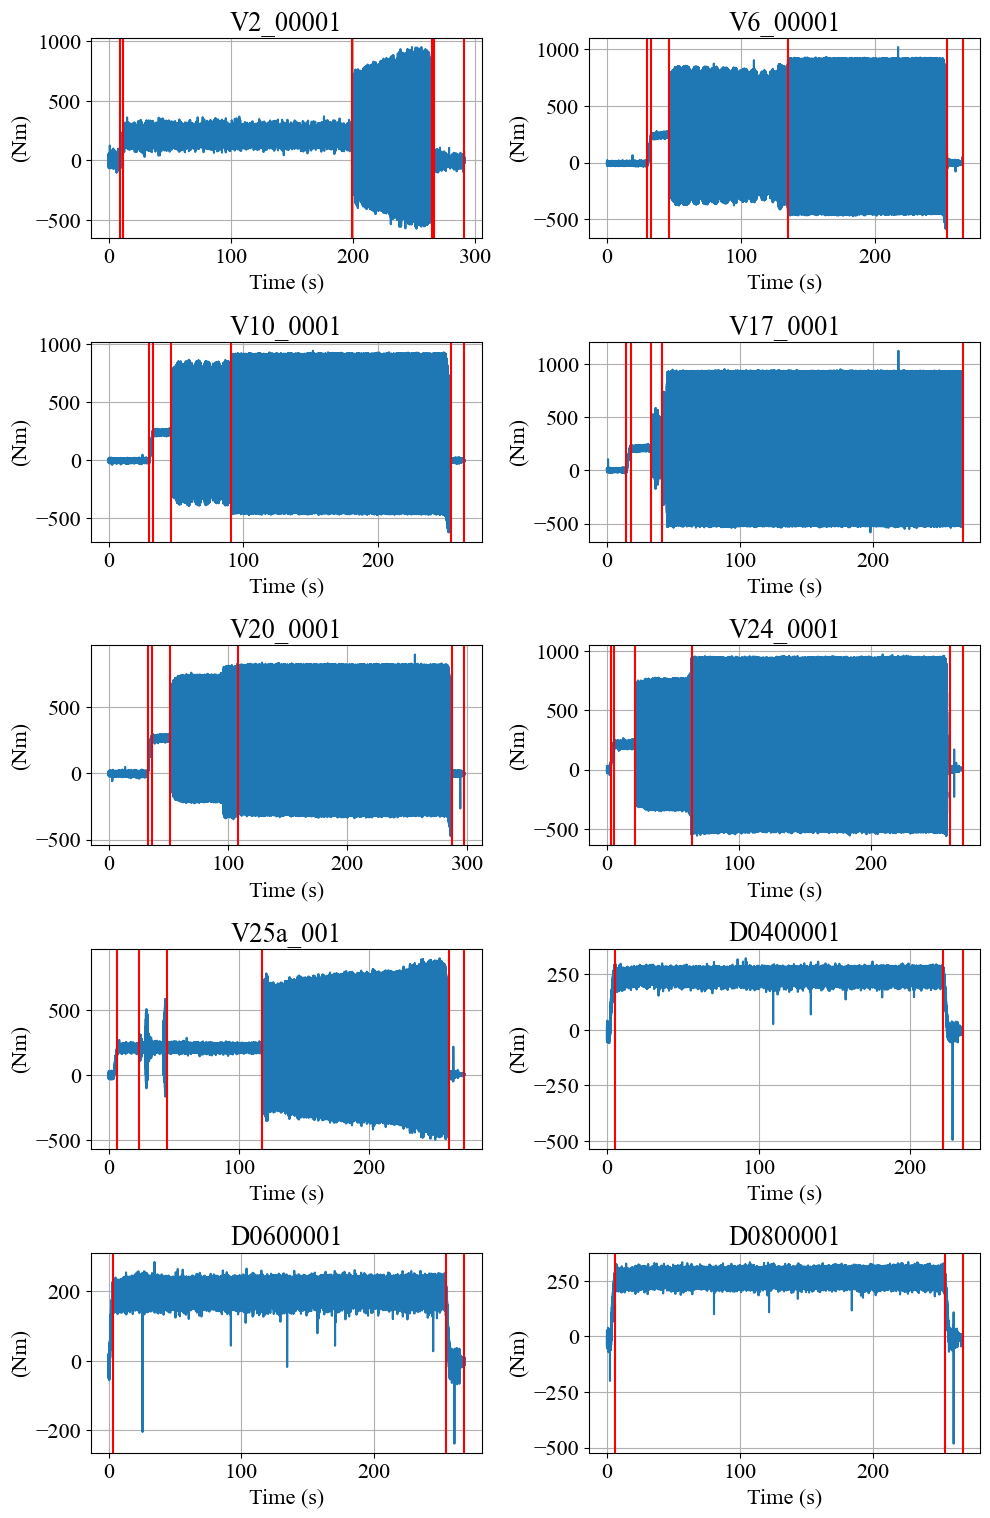

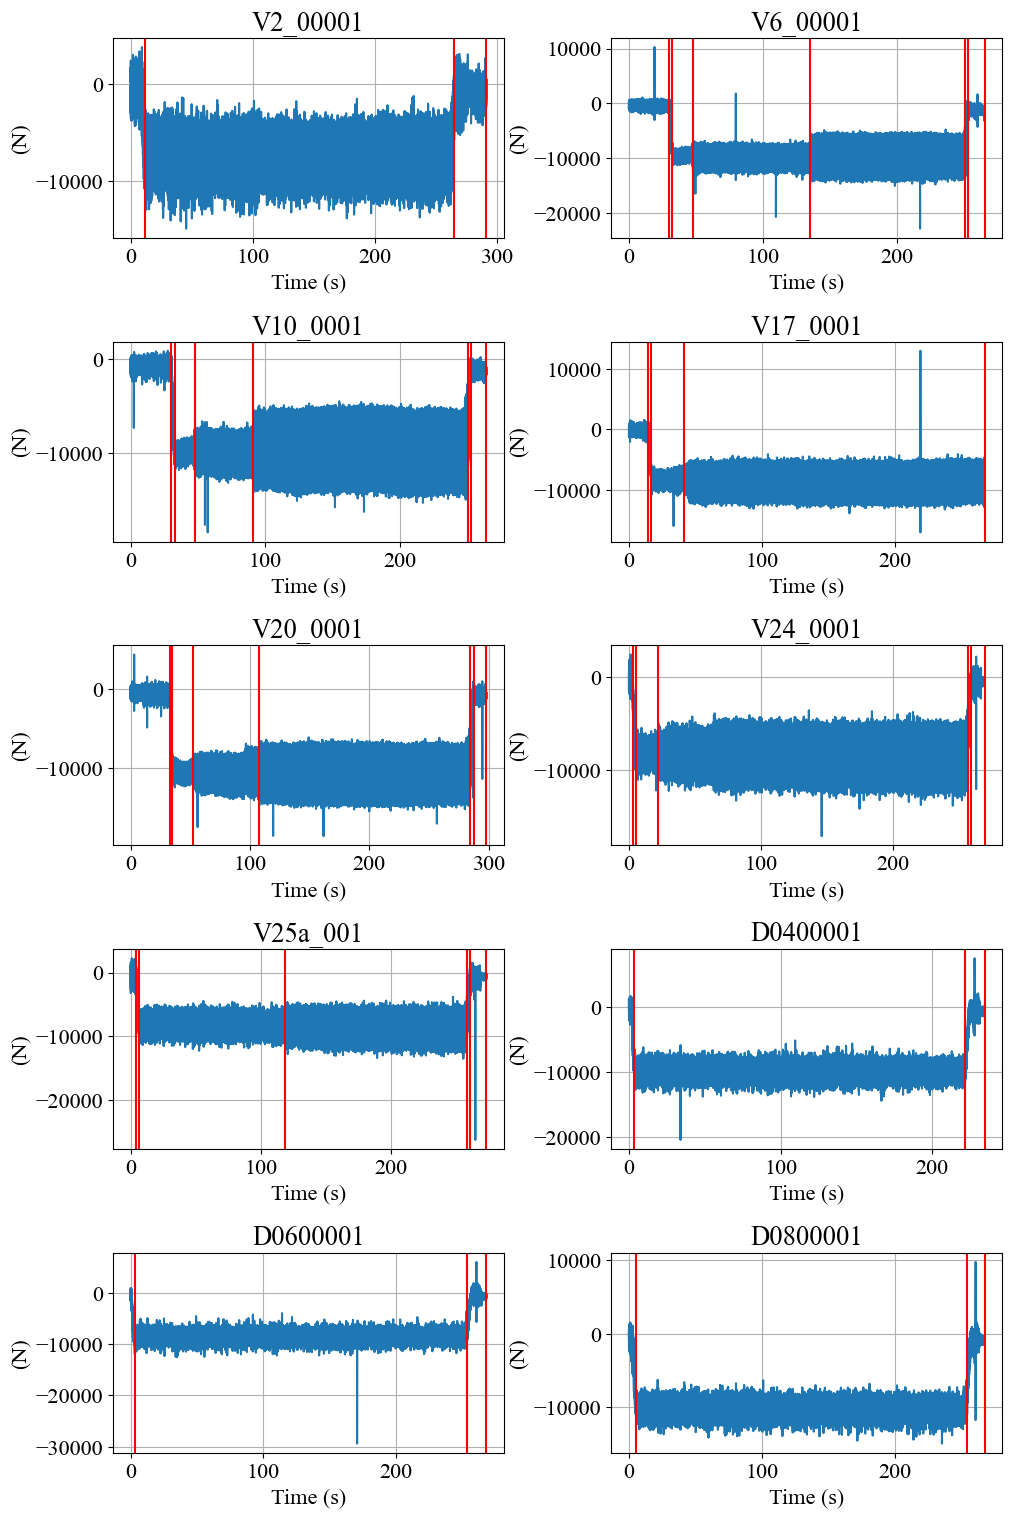

In [24]:
datasets = [
            'V2_00001',
            'V6_00001',
            'V10_0001',
            'V17_0001',
            'V20_0001',
            'V24_0001',
            'V25a_001',
            'D0400001',
            'D0600001',
            'D0800001',
        ]
plot_change_points_all(datasets, data, changepoints, "CH1_Moment", (10, 15), "All_datasets_CH1_cpt.pdf")
plot_change_points_all(datasets, data, changepoints, "CH2_Kraft", (10, 15), "All_datasets_CH2_cpt.pdf")

In [63]:
selected_datasets = {
 'V2_00001':3,
 'V10_0001':3,
 'V6_00001':3,
 'V17_0001':3,
 'V20_0001':3,
 'V24_0001':3,
 'V25a_001':4
}

sensor = "CH1_Moment"
durations = 0
for key in selected_datasets:
    c = selected_datasets[key]-1
    cpts = changepoints[key][sensor]["change_points"]
    indexes = changepoints[key][sensor]["indexes"]
    durations += cpts[indexes[c+1]]-cpts[indexes[c]] 
    print(key, round(cpts[indexes[c]], 2))

V2_00001 199.27
V10_0001 46.5
V6_00001 46.59
V17_0001 33.43
V20_0001 51.22
V24_0001 21.05
V25a_001 117.25


In [65]:
durations

64.42114285714287

In [69]:
selected_datasets = {
 'V2_00001':3,
 'V10_0001':4,
 'V6_00001':4,
 'V17_0001':4,
 'V20_0001':4,
 'V24_0001':4,
 'V25a_001':4
}

sensor = "CH2_Kraft"

for key in selected_datasets:
    c = selected_datasets[key]-1
    cpts = changepoints[key][sensor]["change_points"]
    indexes = changepoints[key][sensor]["indexes"]
    print(key, round(cpts[indexes[c]], 2))

V2_00001 291.5
V10_0001 90.94
V6_00001 134.61
V17_0001 267.46
V20_0001 107.1
V24_0001 256.83
V25a_001 257.96
